
# 📊Sales & Profitability Analysis for a Global Superstore
# Project Overview

This project analyzes transactional sales data from a global retail superstore to evaluate revenue performance, profitability trends, and operational efficiency. Using Python for data analysis and Tableau for visualization, the project focuses on uncovering insights related to profit margins, discount impact, customer segments, and regional performance.

The analysis highlights the difference between sales and profit, identifies loss-making products and regions, and provides strategic recommendations to improve overall business performance.

### Business Objective

The primary objective of this project is to:
- Analyze overall sales and profit performance
- Identify the most and least profitable product categories
- Evaluate the impact of discounts on profitability
- Compare regional and segment-level performance
- Detect loss-making products and operational inefficiencies
- Provide actionable insights to support margin improvement and revenue growth
- Dataset Description

The dataset contains transactional sales records from a global superstore. Each row represents a product-level order with detailed information about customers, products, shipping, sales, discounts, and profit.

### Key Columns
🆔 Order Information

Row ID: Unique row identifier

Order ID: Unique identifier for each order

Order Date: Date when the order was placed

Ship Date: Date when the order was shipped

Ship Mode: Shipping method (Standard, First Class, Same Day, etc.)

### 👤 Customer Information

Customer ID: Unique customer identifier

Customer Name: Customer name

Segment: Customer segment (Consumer, Corporate, Home Office)

### 🌍 Geographic Information

Country: Country of sale

City: Customer’s city

State: Customer’s state

Postal Code: Zip/postal code

Region: Business region (West, East, Central, South)

### 🛍️ Product Information

Product ID: Unique product code

Category: Product category (Furniture, Office Supplies, Technology)

Sub-Category: Product sub-classification

Product Name: Name of the product

### 💰 Financial Metrics

Sales: Revenue generated from the order

Quantity: Number of units sold

Discount: Discount applied to the order

Profit: Profit earned after discount and cost

### 🛠️Tools Used

Python (Pandas, NumPy) – Data cleaning, transformation, and profitability analysis

Jupyter Notebook – Analysis workflow and documentation

Tableau – Interactive dashboard design and visualization

GitHub – Version control and project portfolio hosting

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df = pd.read_excel(r"C:\Users\User\Downloads\Sample - Superstore.xls")

In [71]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,US-2022-103800,2022-01-03,2022-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,2,US-2022-112326,2022-01-04,2022-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
2,3,US-2022-112326,2022-01-04,2022-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
3,4,US-2022-112326,2022-01-04,2022-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
4,5,US-2022-141817,2022-01-05,2022-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          10194 non-null  int64         
 1   Order ID        10194 non-null  object        
 2   Order Date      10194 non-null  datetime64[ns]
 3   Ship Date       10194 non-null  datetime64[ns]
 4   Ship Mode       10194 non-null  object        
 5   Customer ID     10194 non-null  object        
 6   Customer Name   10194 non-null  object        
 7   Segment         10194 non-null  object        
 8   Country/Region  10194 non-null  object        
 9   City            10194 non-null  object        
 10  State/Province  10194 non-null  object        
 11  Postal Code     10194 non-null  object        
 12  Region          10194 non-null  object        
 13  Product ID      10194 non-null  object        
 14  Category        10194 non-null  object        
 15  Su

In [73]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country/Region    0
City              0
State/Province    0
Postal Code       0
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
Quantity          0
Discount          0
Profit            0
dtype: int64

In [74]:
df['Order Year'] = df['Order Date'].dt.year

In [75]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year
10189,10190,US-2025-143259,2025-12-30,2026-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,2025
10190,10191,US-2025-115427,2025-12-30,2026-01-03,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,...,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750,2025
10191,10192,US-2025-156720,2025-12-30,2026-01-03,Standard Class,JM-15580,Jill Matthias,Consumer,United States,Loveland,...,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,2025
10192,10193,US-2025-143259,2025-12-30,2026-01-03,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,...,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,2025
10193,10194,CA-2025-143500,2025-12-30,2026-01-03,Standard Class,HO-15230,Harry Olson,Consumer,Canada,Charlottetown,...,East,OFF-BI-10004040,Office Supplies,Binders,Wilson Jones Impact Binders,3.024,3,0.2,-0.6048,2025


NEGATIVE PROFIT : Shows where the company is losing money

In [76]:
loss_df = df[df['Profit'] < 0]

print("Number of Loss Transactions:", len(loss_df))
print("Total Loss Amount:", loss_df['Profit'].sum())


Number of Loss Transactions: 1901
Total Loss Amount: -157038.9302


Loss by Category

In [77]:
loss_by_category = loss_df.groupby('Category')['Profit'].sum().sort_values()

loss_by_category


Category
Furniture         -61675.1837
Office Supplies   -56783.8283
Technology        -38579.9182
Name: Profit, dtype: float64

Top 10 loss-Making Products

In [78]:
top_loss_products = (
    loss_df.groupby('Product Name')['Profit']
    .sum()
    .sort_values()
    .head(10)
)

top_loss_products


Product Name
Cubify CubeX 3D Printer Double Head Print                                     -9239.9692
GBC DocuBind P400 Electric Binding System                                     -6859.3896
Lexmark MX611dhe Monochrome Laser Printer                                     -5269.9690
GBC Ibimaster 500 Manual ProClick Binding System                              -5098.5660
GBC DocuBind TL300 Electric Binding System                                    -4162.0336
Cubify CubeX 3D Printer Triple Head Print                                     -3839.9904
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind   -3431.6730
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases                      -3107.5272
Ibico EPK-21 Electric Binding System                                          -2929.4845
Bush Advantage Collection Racetrack Conference Table                          -2545.2600
Name: Profit, dtype: float64

PROFIT MARGIN: identifies profitable products

In [79]:
# Create Profit Margin column
df['Profit_Margin'] = df['Profit'] / df['Sales']

# Convert to percentage
df['Profit_Margin_%'] = df['Profit_Margin'] * 100

In [80]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Profit_Margin,Profit_Margin_%
0,1,US-2022-103800,2022-01-03,2022-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,2022,0.3375,33.75
1,2,US-2022-112326,2022-01-04,2022-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,2022,-1.5500,-155.00
2,3,US-2022-112326,2022-01-04,2022-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,2022,0.3625,36.25
3,4,US-2022-112326,2022-01-04,2022-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,2022,-0.2375,-23.75
4,5,US-2022-141817,2022-01-05,2022-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,2022,0.2500,25.00


Average Profit Margin

In [81]:
avg_margin = df['Profit_Margin_%'].mean()
print(f"Average Profit Margin: {avg_margin:.2f}%")


Average Profit Margin: 12.22%


left for the high discount if necessary

SALES AND PROFIT ANALYSIS

In [82]:
#Total Sales
df['Sales'].sum()

np.float64(2326534.3543)

In [83]:
#Total Profit
df['Profit'].sum()

np.float64(292296.8145999999)

In [84]:
#Total Orders
df['Order ID'].nunique()

5111

In [85]:
df['Profit_Margin'].sum()

np.float64(1245.8887017519041)

Category Analysis

In [86]:
#Sales by Category
df.groupby('Category')['Sales'].sum().sort_values(ascending= False)

Category
Technology         839893.2790
Furniture          754747.7613
Office Supplies    731893.3140
Name: Sales, dtype: float64

In [87]:
#Profit by Category
df.groupby('Category')['Profit'].sum().sort_values(ascending= False)

Category
Technology         146543.3756
Office Supplies    126023.4434
Furniture           19729.9956
Name: Profit, dtype: float64

In [88]:
#Profit Margin by Category
margin_by_category = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum'
})

margin_by_category['Profit_Margin_%'] = (
    margin_by_category['Profit'] / margin_by_category['Sales']
) * 100

margin_by_category

,Sales,Profit,Profit_Margin_%
Category,,,
Furniture,754747.7613,19729.9956,2.614118
Office Supplies,731893.3140,126023.4434,17.218827
Technology,839893.2790,146543.3756,17.447857


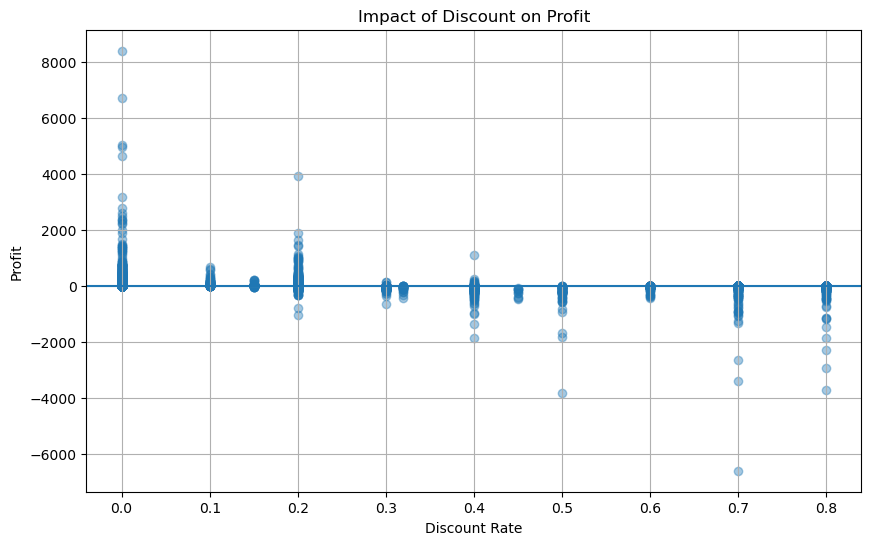

In [89]:
plt.figure(figsize=(10,6))

plt.scatter(df['Discount'], df['Profit'], alpha=0.4)

plt.xlabel("Discount Rate")
plt.ylabel("Profit")
plt.title("Impact of Discount on Profit")

plt.axhline(0)  # Zero profit line
plt.grid(True)

plt.show()


There is a general downward trend, as the discount rate increases, profit tends to decrease. High discounts are often linked to negative profitability.

Regional Performance

In [90]:
#Sales by Region
df.groupby('Region')['Sales'].sum().sort_values(ascending=False)

Region
West       739813.6085
East       691828.1680
Central    503170.6728
South      391721.9050
Name: Sales, dtype: float64

In [91]:
#Profit by Region
df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

Region
West       110798.8170
East        94883.2603
South       46749.4303
Central     39865.3070
Name: Profit, dtype: float64

In [92]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Profit_Margin,Profit_Margin_%
0,1,US-2022-103800,2022-01-03,2022-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,2022,0.3375,33.75
1,2,US-2022-112326,2022-01-04,2022-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,2022,-1.5500,-155.00
2,3,US-2022-112326,2022-01-04,2022-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,2022,0.3625,36.25
3,4,US-2022-112326,2022-01-04,2022-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,2022,-0.2375,-23.75
4,5,US-2022-141817,2022-01-05,2022-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,2022,0.2500,25.00


In [93]:
#Loss-making states

df[df['Profit'] < 0].groupby('State/Province')['Profit'].sum().sort_values()


State/Province
Texas                  -36813.1875
Ohio                   -21750.0002
Pennsylvania           -21602.8515
Illinois               -19501.6975
North Carolina         -11557.9854
Colorado                -8900.9048
Florida                 -8689.8295
Tennessee               -7257.0174
Arizona                 -6656.7675
New York                -5031.1378
California              -3769.6651
Oregon                  -2890.4764
Massachusetts            -566.2617
Washington               -387.8706
Quebec                   -238.6402
Rhode Island             -230.1678
British Columbia         -194.3560
Ontario                  -174.2642
Nevada                   -109.5822
New Hampshire            -105.3164
Nova Scotia               -99.2120
Delaware                  -85.8963
New Brunswick             -83.9040
West Virginia             -76.9536
Maryland                  -71.1170
Alberta                   -59.8400
Manitoba                  -56.2185
New Jersey                -51.2906
Conne

Customer Segment Analysis

In [94]:
#Sales by Segment
df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)

Segment
Consumer       1.170660e+06
Corporate      7.158061e+05
Home Office    4.400684e+05
Name: Sales, dtype: float64

In [95]:
#Profit by Segment
df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)

Segment
Consumer       136371.4463
Corporate       94249.6400
Home Office     61675.7283
Name: Profit, dtype: float64

In [96]:
#average order value by segment
order_sales = df.groupby(['Order ID', 'Segment'])['Sales'].sum().reset_index()

In [97]:
aov_by_segment = order_sales.groupby('Segment')['Sales'].mean().reset_index()

aov_by_segment.rename(columns={'Sales': 'Average_Order_Value'}, inplace=True)

aov_by_segment


,Segment,Average_Order_Value
0,Consumer,445.456540
1,Corporate,461.215293
2,Home Office,472.683601


In [98]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country/Region', 'City',
       'State/Province', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Order Year', 'Profit_Margin', 'Profit_Margin_%'],
      dtype='object')

Top & Bottom Products Analysis

In [99]:
#Top 10 by Profit
df.groupby('Product Name')['Profit'].sum().sort_values(ascending= False).head(10)

Product Name
Canon imageCLASS 2200 Advanced Copier                                          25199.9280
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind     7753.0390
Hewlett Packard LaserJet 3310 Copier                                            6983.8836
Canon PC1060 Personal Laser Copier                                              4570.9347
HP Designjet T520 Inkjet Large Format Printer - 24" Color                       4094.9766
Ativa V4110MDD Micro-Cut Shredder                                               3772.9461
3D Systems Cube Printer, 2nd Generation, Magenta                                3717.9714
Plantronics Savi W720 Multi-Device Wireless Headset System                      3696.2820
Ibico EPK-21 Electric Binding System                                            3345.2823
Zebra ZM400 Thermal Label Printer                                               3343.5360
Name: Profit, dtype: float64

In [100]:
#Bottom 10 by Profit
df.groupby('Product Name')['Profit'].sum().sort_values(ascending= False).tail(10)

Product Name
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables   -1148.4375
Balt Solid Wood Round Tables                                        -1201.0581
Martin Yale Chadless Opener Electric Letter Opener                  -1299.1836
Cisco TelePresence System EX90 Videoconferencing Unit               -1811.0784
GBC DocuBind P400 Electric Binding System                           -1878.1662
Bush Advantage Collection Racetrack Conference Table                -1934.3976
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases            -2876.1156
Cubify CubeX 3D Printer Triple Head Print                           -3839.9904
Lexmark MX611dhe Monochrome Laser Printer                           -4589.9730
Cubify CubeX 3D Printer Double Head Print                           -8879.9704
Name: Profit, dtype: float64

In [101]:
df.to_csv('renewed_globalsuperstore.csv', index= False)